<font color='blue' size='7'>**Домашняя работа**</font>  
<font color='1A9BFF' size='6'>**Тема: Машинное обучение. Алгоритм KNN**</font>  
<font size='5'>**Задание:**</font>  

1. Загрузите данные о пассажирах Титаника. Данные можно скачать с сайта Kaggle по ссылке https://www.kaggle.com/c/titanic/data?select=train.csv или загрузить из библиотеки Seaborn командой sns.load_dataset('titanic').
2. Проверьте данные на наличие пропусков и обработайте их.
3. Если в данных присутствуют категориальные переменные, проведите их обработку.
4. Постройте алгоритм K-ближайших соседей (KNN). Для выбора оптимальных гиперпараметров используйте метод gridsearch.
5. Проверьте, насколько модель переобучена, используя кросс-валидацию.
6. Рассчитайте метрики качества модели: матрицу ошибок, accuracy, precision, recall и AUC-ROC.
7. Объясните, имеет ли смысл рассчитывать метрику MAE в данном контексте и почему.




<font size='5'>**Решение:**</font>  

<font color='1A9BFF'>**Установка и импорт необходимых библиотек**</font>

In [3]:
# для обработки категориальных переменных
#!pip install category_encoders -q

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import category_encoders as ce

from sklearn.metrics import mean_absolute_error, mean_squared_error

<font color='1A9BFF'>**Загрузите набор данных титаник**</font>

In [2]:
file_name='train.csv'
df = pd.read_csv(file_name)
##df = sns.load_dataset('titanic')

## EDA

<font color='1A9BFF'>**Посмотрите на первые 5 строк**</font>

In [7]:
# здесь ваш код (может быть несколько ячеек)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<font color='1A9BFF'>**Проверьте, все ли типы данных верные. Если где-то назанчен неверный тип данных, исправьте**</font>



In [9]:
# здесь ваш код (может быть несколько ячеек)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


><font color='green'>**Ваш вывод: ?????**</font> <br>
>Типы дынных назначенны корректно

<font color='1A9BFF'>**Проверка на пропуски**</font>



In [10]:
# здесь ваш код (может быть несколько ячеек)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.shape

(891, 12)

In [7]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [12]:
#df[df['Cabin'].notna()].groupby('Pclass')['Cabin'].count()
#df[df['Cabin'].isna()].groupby('Pclass').agg({'Cabin': 'count', 'Survived': 'sum'})

,Cabin,Survived
Pclass,,
1,0,19
2,0,74
3,0,113


In [22]:
# подсчет непустых значений 'Cabin' и количества выживших 'Survived' для каждого класса
#df[df['Cabin'].notna()].groupby('Pclass').agg({'Cabin': 'count', 'Survived': 'sum'})



,Cabin,Survived
Pclass,,
1,176,117
2,16,13
3,12,6


In [14]:
print(df.groupby('Pclass')['Survived'].count())
print(df.groupby('Pclass')['Survived'].sum())

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64
Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


In [20]:
#количесвто спашихся в каждом класе у кого заполнены номера кают 
#деленное на общее количество записей в котрых заполнены номера кают
df[df['Cabin'].notna()].groupby('Pclass')['Survived'].sum()/df[df['Cabin'].notna()].groupby('Pclass')['Cabin'].count()

Pclass
1    0.664773
2    0.812500
3    0.500000
dtype: float64

In [3]:
df[df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [11]:
print('Средний возраст спасшихся мужчин:', df[(df['Survived'] == 1) & (df['Sex'] == 'male')]['Age'].mean())
print('Средний возраст НЕ спасшихся мужчин:', df[(df['Survived'] == 0) & (df['Sex'] == 'male')]['Age'].mean())
print('Средний возраст спасшихся женщин:', df[(df['Survived'] == 1) & (df['Sex'] == 'female')]['Age'].mean())
print('Средний возраст НЕ спасшихся женщин:', df[(df['Survived'] == 0) & (df['Sex'] == 'female')]['Age'].mean())

Средний возраст спасшихся мужчин: 27.276021505376345
Средний возраст НЕ спасшихся мужчин: 31.618055555555557
Средний возраст спасшихся женщин: 28.84771573604061
Средний возраст НЕ спасшихся женщин: 25.046875


In [3]:
#Замена пропущенных значений средним занчением в соовтесвтующей группе
def fill_age(row):
    if pd.isnull(row['Age']):
        if row['Sex'] == 'male': 
            if row['Survived'] == 1:
                return 27
            else:
               return 32
        else:
            if row['Survived'] == 1:
                return 29
            else:
               return 25
    else:
        return row['Age']

# Применение функции к DataFrame
df['Age'] = df.apply(fill_age, axis=1)


In [4]:
# Нахождение наиболее часто встречающегося значения в столбце 'Embarked'  

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [6]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.000000
dtype: float64

><font color='green'>**Ваш вывод: ?????**</font><br>
1. В столбце 'Cabin' большое количетсво пропусков. В основном пропуски содержат записи пассажиров 3-го класса. Можно было бы предположить что большинтво пассажиров 3-го класса плыло в трюмах и у них не было отдельных кают. Тогда можно было бы добавить столбец содержащий значения 1 для пассажиров у которых заполнены данные поля и 0 для запеисей в кторых номера кают не заполнены. Но оценка отношения числа спасшихся пассажиров в классе  к общему количесвту пассажиров с заполнеными значениями номеро вкают показывает что примерно половина пассажиров у которых были отельные каюты не спаслись. Из чего модно сделать вывод что этот признак не оказывает существенного влияния на целевой переменую и столбец 'Cabin' можно не использвоать в модели



Значени в столбце "Возраст" были поделены на группы по признакам пола и спашихся/не спасшихся паасжиров. Пропуски в  группах были заполенны срденим значением по соотвествующих группе. 

<font color='1A9BFF'>**анализ категориальных переменных**</font>



сколько категориальных признаков

In [8]:
# здесь ваш код (может быть несколько ячеек)
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,204,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hodges, Mr. Henry Price",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,646
mean,446.000000,0.383838,2.308642,NaN,NaN,29.811639,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.048168,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,29.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Посмотрите на значения категориальных признаков

In [9]:
# здесь ваш код (может быть несколько ячеек)
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

Какие категориальные признаки будем использовать в модели?

In [5]:
# Преобразование категориальных переменных в числовые
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1


><font color='green'>**Ваш вывод:  ?????**</font>



Признак пола оказывает вляние на шансы выжить, поэтому к нему применили метод преобразвония категориальных переменных, остальные признаки не оказывают влияние на целевой признак, поэтому они в модели учитываться не будут.

## Разделим выборку на тренировочную и тестовую

In [6]:
# здесь ваш код (может быть несколько ячеек)
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']


In [7]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Масштабирование признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Подготовка датасета к построению моделей

<font color='red'>**! Важно! Все трансформеры обучаем на тренировочной выборке, к тестовой только применяем!**</font>



<font color='1A9BFF'>**Обработка пропусков**</font>



In [ ]:
# здесь ваш код (может быть несколько ячеек)

<font color='1A9BFF'>**Обработка категориальных признаков**</font>



In [ ]:
# здесь ваш код (может быть несколько ячеек)

><font color='green'>**Ваш вывод:  ?????**</font><br>
выполненно в предыдущих пунктах


## Построение модели

<font color='1A9BFF'>**1. Задайте сетку параметров для параметров: n_neighbors, p**</font>   
<font color='1A9BFF'>**2. С помощью gridsearch выберите наилучшие параметры n_neighbors, p**</font>   
<font color='1A9BFF'>**3. С помощью кросс-валидации убедитесь, что модель с минимальным переобучением**</font>



In [9]:
# здесь ваш код (может быть несколько ячеек)
# Задание сетки параметров
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'p': [1, 2]
}


In [10]:


knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


print(f'Best parameters: {grid_search.best_params_}')



Best parameters: {'n_neighbors': 3, 'p': 2}


In [11]:
# Оценка модели с наилучшими параметрами
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')



Accuracy: 0.80


In [19]:
# Кросс-валидация для оценки модели
cv_scores = cross_val_score(best_knn, X, y, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean():.2f}')

Cross-validation scores: [0.68715084 0.7247191  0.74157303 0.76966292 0.74719101]
Mean cross-validation score: 0.73


><font color='green'>**Ваш вывод:  ?????**</font> <br>
Оценка модели с помощью кросс валидации показала что модель не переобучена и параметры подорбраны оптимально


## Оценка качества финальной модели



<font color='1A9BFF'>**Посчитайте метрики качества: матрицу ошибок, accuracy, precision, recall, AUC ROC**</font>   

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve

In [12]:
# здесь ваш код (может быть несколько ячеек)
y_pred = best_knn.predict(X_test)
y_pred_proba = best_knn.predict_proba(X_test)[:, 1]

In [15]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC ROC: {roc_auc:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.80
Precision: 0.76
Recall: 0.74
AUC ROC: 0.84
Confusion Matrix:
[[88 17]
 [19 55]]



<font color='1A9BFF'>**постройте график ROC кривой**</font>   

In [17]:
import matplotlib.pyplot as plt

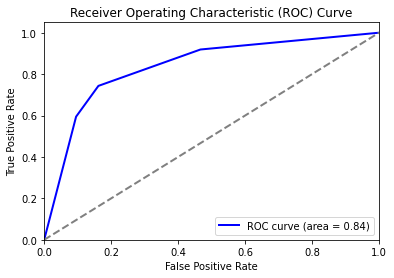

In [18]:
# здесь ваш код (может быть несколько ячеек)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

><font color='green'>**Ваш вывод:  ?????**</font><br>
Площадь под криовй близка к единице, что говорит о высокой точности модели



## Ответ на вопрос

<font color='1A9BFF'>**Имеет ли смысл считать метрику MAE? Почему?**</font>   

><font color='green'>**Ваш вывод:  ?????**</font><br>
МАЕ применяется к числовым признакам, в шагем случае стоит задача классификации а не регриссии
